
  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 6.53e-06

	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to   0.25.
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 4.42e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.27e-06

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 5.95e-06

	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to   0.25.
	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.11e-05

	Energy has increased in a minimization.
	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to  0.188.
	Previous geometry is closer to target in internal coordinates, so using t

Optimizer: Optimization complete!
Optimized SCF Energy: -637.3278656658931

Atom RESP Charges:
C RESP: -0.24
N RESP: -0.02
C RESP: 0.14
N RESP: -0.52
C RESP: 0.20
C RESP: -0.01
C RESP: 0.45
O RESP: -0.53
N RESP: -0.44
C RESP: 0.50
O RESP: -0.55
N RESP: -0.02
C RESP: -0.02
H RESP: 0.13
H RESP: 0.13
H RESP: 0.13
H RESP: 0.17
H RESP: 0.35
H RESP: 0.06
H RESP: 0.06
H RESP: 0.06

Atom RESP Charges:
C RESP: -0.24
N RESP: -0.02
C RESP: 0.14
N RESP: -0.52
C RESP: 0.20
C RESP: -0.01
C RESP: 0.45
O RESP: -0.53
N RESP: -0.44
C RESP: 0.50
O RESP: -0.55
N RESP: -0.02
C RESP: -0.02
H RESP: 0.13
H RESP: 0.13
H RESP: 0.13
H RESP: 0.17
H RESP: 0.35
H RESP: 0.06
H RESP: 0.06
H RESP: 0.06

Mulliken Charges: [-0.11719569 -0.69112733  0.38767236 -0.62180632  0.63478788  0.09007183
  0.87156977 -0.61259363 -0.86240683  1.05614165 -0.61732290 -0.86493785
 -0.12288557  0.16881791  0.13213106  0.16798021  0.18400195  0.34663071
  0.15035226  0.16960669  0.15051182]

Lowdin Charges: [-0.13401318 -0.05444172  0.

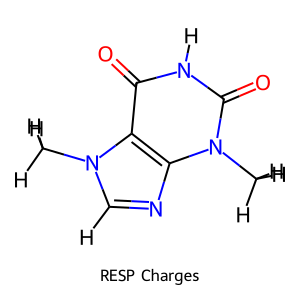

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from psikit import Psikit

# 初始化 Psikit 对象
pk = Psikit(debug=True, threads=1, memory=12)

# 读取咖啡因的 SMILES 表示
pk.read_from_smiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)")

# 优化分子结构
optimized_energy = pk.optimize()
print(f"Optimized SCF Energy: {optimized_energy}")

# 计算 RESP 电荷
resp_charges = pk.calc_resp_charges()
if resp_charges is not None:
    print("\nAtom RESP Charges:")
    for i, atom in enumerate(pk.mol.GetAtoms()):
        print(f"{atom.GetSymbol()} RESP: {resp_charges[i]:.2f}")
else:
    print("RESP 电荷计算失败，请确保已安装 resp 工具。")

# 输出每个原子的元素符号及其 RESP 电荷
print("\nAtom RESP Charges:")
for i, atom in enumerate(pk.mol.GetAtoms()):
    print(f"{atom.GetSymbol()} RESP: {resp_charges[i]:.2f}")

# 计算 Mulliken 电荷
mulliken_charges = pk.calc_mulliken_charges()
print("\nMulliken Charges:", mulliken_charges)

# 计算 Lowdin 电荷
lowdin_charges = pk.calc_lowdin_charges()
print("\nLowdin Charges:", lowdin_charges)

# 显示带有 RESP 电荷的分子结构
for i, atom in enumerate(pk.mol.GetAtoms()):
    atom.SetProp("RESP Charge", f"{resp_charges[i]:.2f}")

# 可视化带有 RESP 电荷标记的分子结构
Draw.MolToImage(pk.mol, legend="RESP Charges")